In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from classes.Rowhouse import read_and_clean_data, train_model, load_model
from classes.house_input import start

In [2]:
%matplotlib inline

### Model 

Get the model and the training + test sets
-
This will also write the model to "./data/rowhouse_model.pickle"

In [3]:
df = read_and_clean_data()

lm,x_train,x_test,y_train,y_test = train_model(df)


Model saved!


Show the score of the model

In [4]:
lm.score(x_test,y_test)

0.712875798744536

Test the load_model and get the same result as above on the score test

In [5]:
test = load_model()

Model loading


In [6]:
test.score(x_test,y_test)

0.712875798744536

In [7]:
user_input = start()

Enter property area in whole numbers, input counts as squaremeters - 280
Enter house area in whole numbers, input counts as squaremeters - 134
Enter amount of toilets: 4
Enter amount of bathrooms: 3
Enter amount of rooms: 7
Enter the year the building was made: 2004
Enter the monthly payments for this property decimals allowed: 5000
Input validation complete


In [8]:
test_ready = np.array([user_input])

price = lm.predict(test_ready)
print("The model predicts the house price to be:" , round(price[0],2),"DK")

The model predicts the house price to be: 5071188.17 DK


### Visual presentation
Pairlot to help spot something to look out for. Could be outliers or a tendency that you may not have spotted otherwise

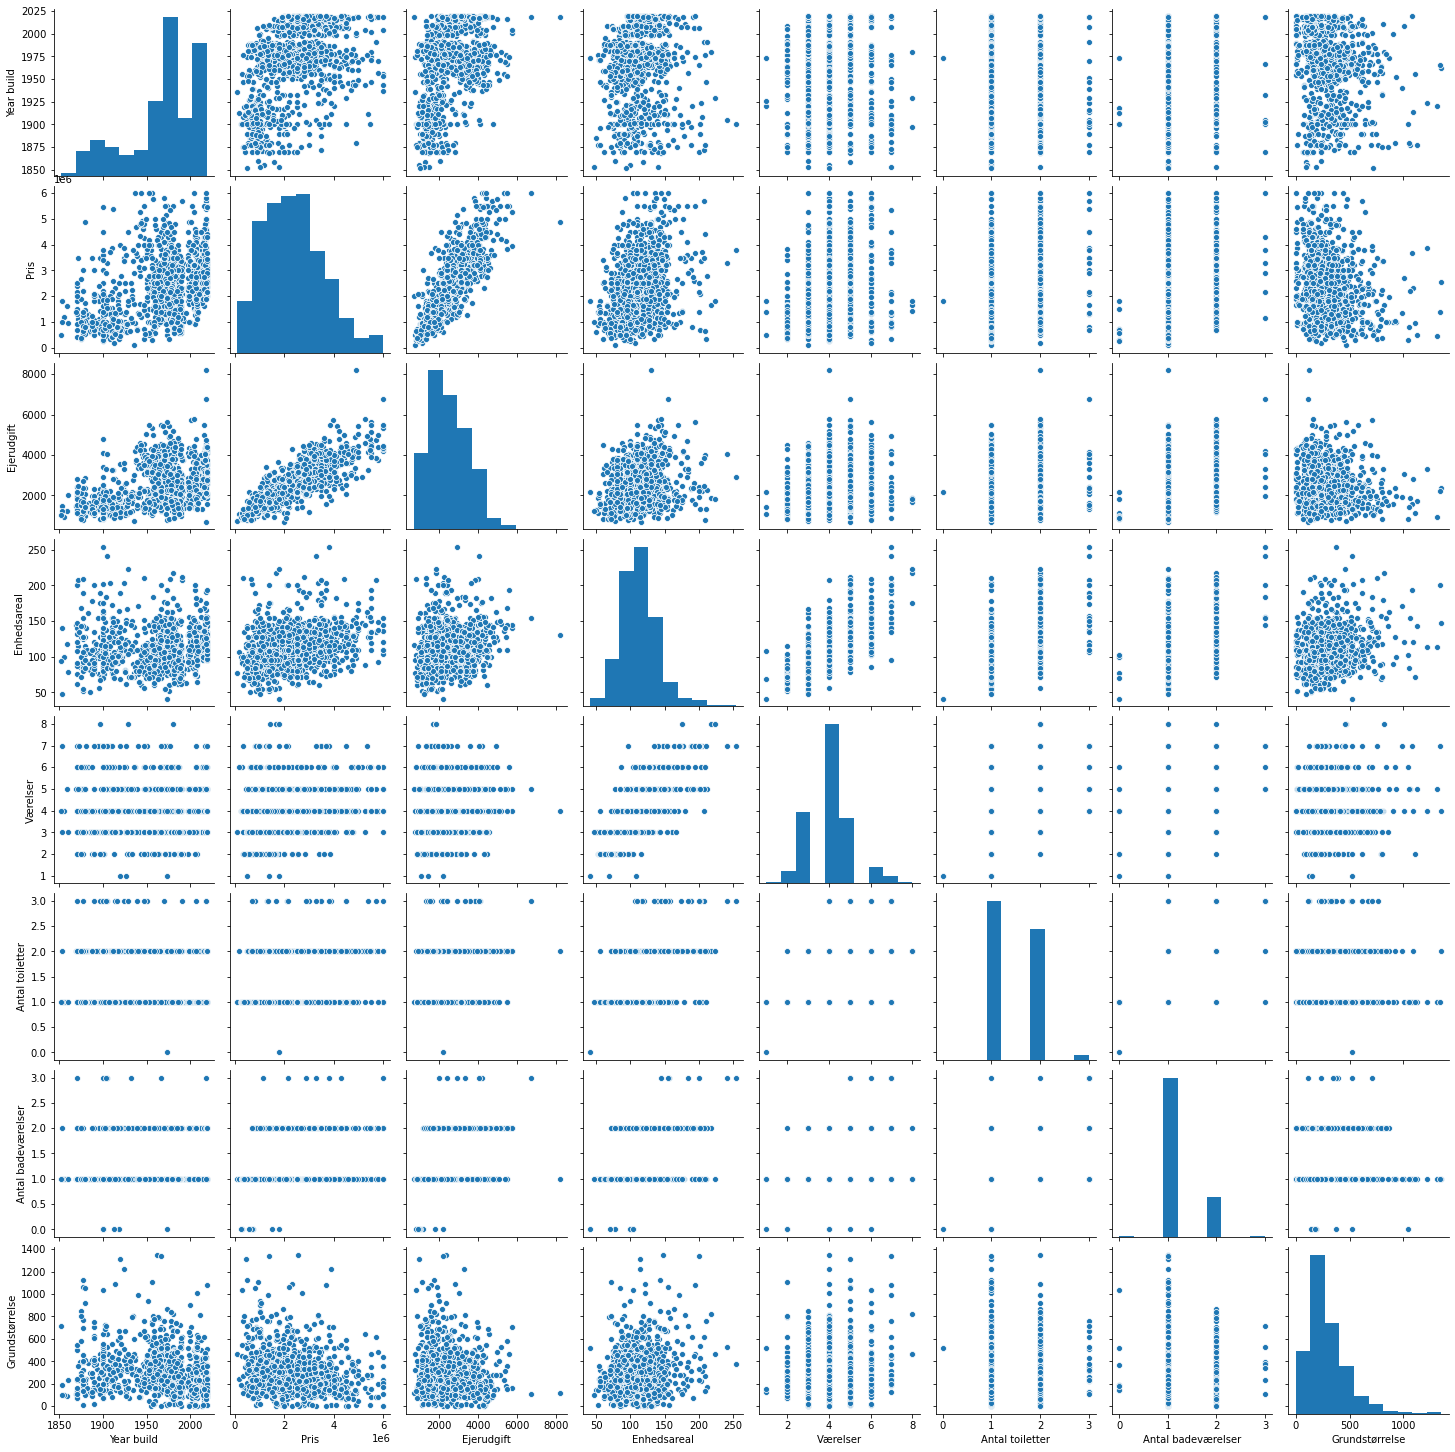

In [9]:
sb.pairplot(df)

The prediction is not a straight line, so the model needs some more work to be more accurate.

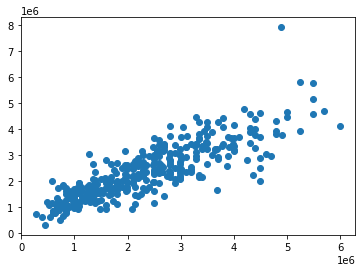

In [10]:
predictions = lm.predict(x_test)
plt.scatter(y_test,predictions)

The distribution of prices compared to the model. It looks fairly similar but not perfect

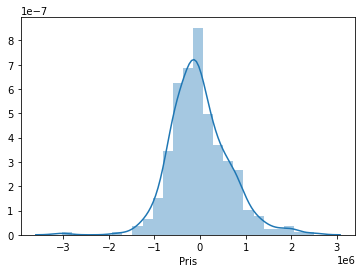

In [11]:
sb.distplot((y_test-predictions))